In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
%matplotlib inline
from scipy import stats

In [4]:
ESS_data = pd.read_csv('ESS_practice_data.csv')

In [5]:
ESS_data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [6]:
ESS_data_year_country_2012 = ESS_data[ESS_data['year'] == 6].groupby(['cntry','year'],as_index=False)['ppltrst'].mean()
ESS_data_year_country_2014 = ESS_data[ESS_data['year'] == 7].groupby(['cntry','year'],as_index=False)['ppltrst'].mean()
ESS_data_year_country = pd.DataFrame(ESS_data_year_country_2012)
ESS_data_year_country = pd.concat([ESS_data_year_country, ESS_data_year_country_2014],ignore_index=False)

Country: CH; Year: 6


c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


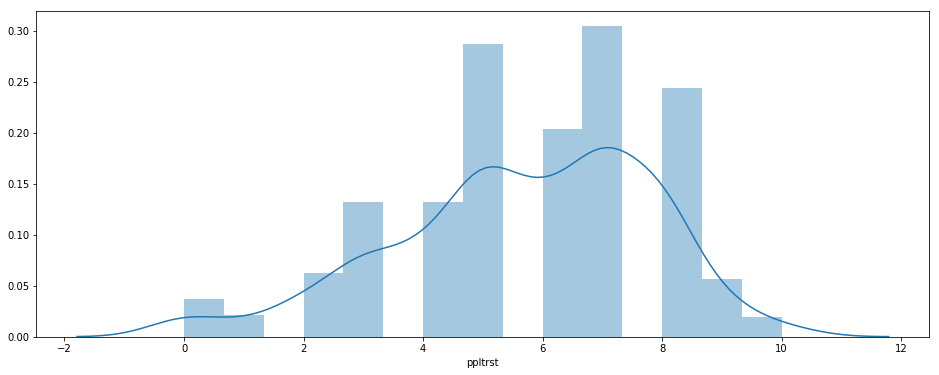

Country: CH; Year: 7


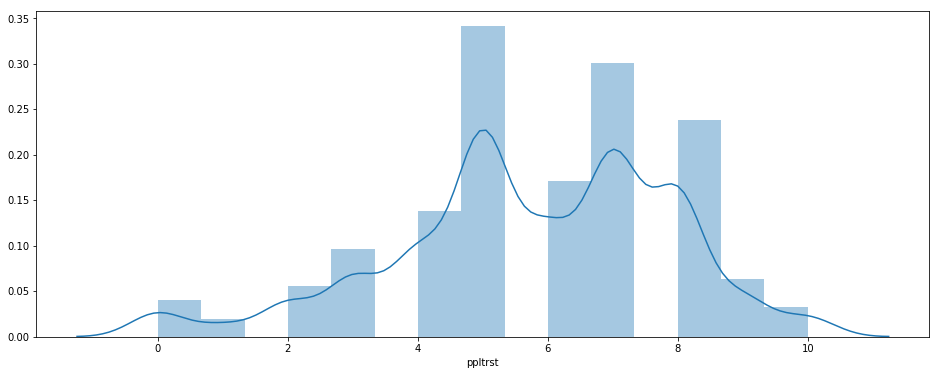

Country: CZ; Year: 6


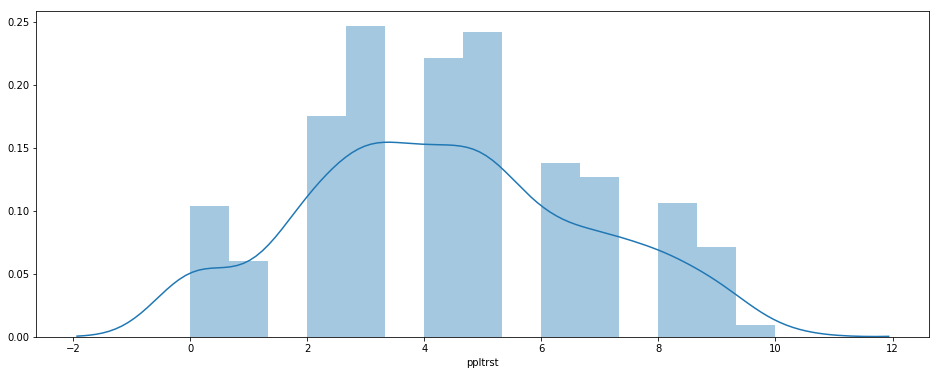

Country: CZ; Year: 7


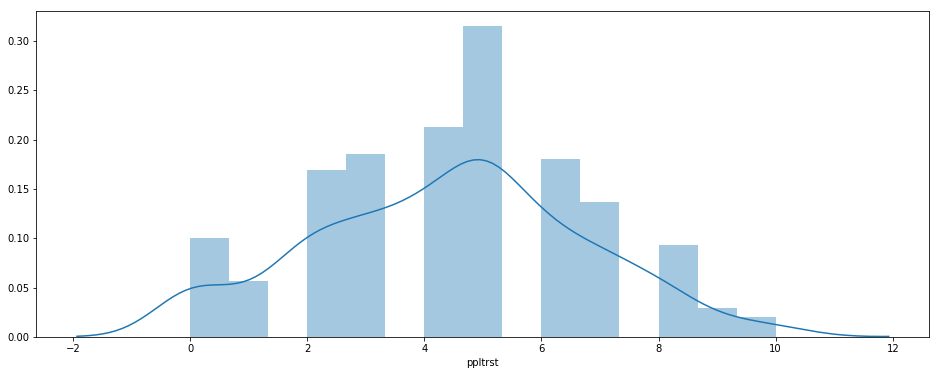

Country: DE; Year: 6


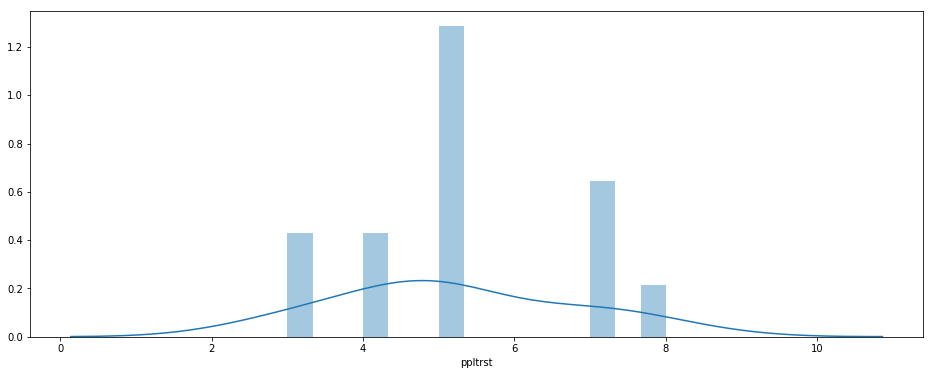

Country: DE; Year: 7


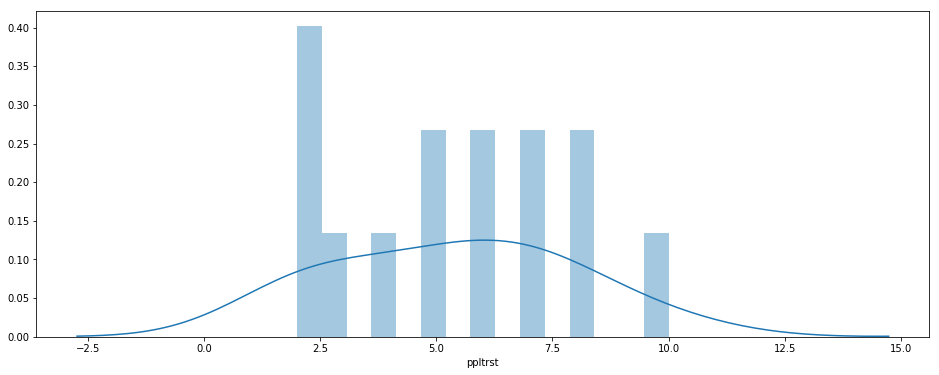

Country: ES; Year: 6


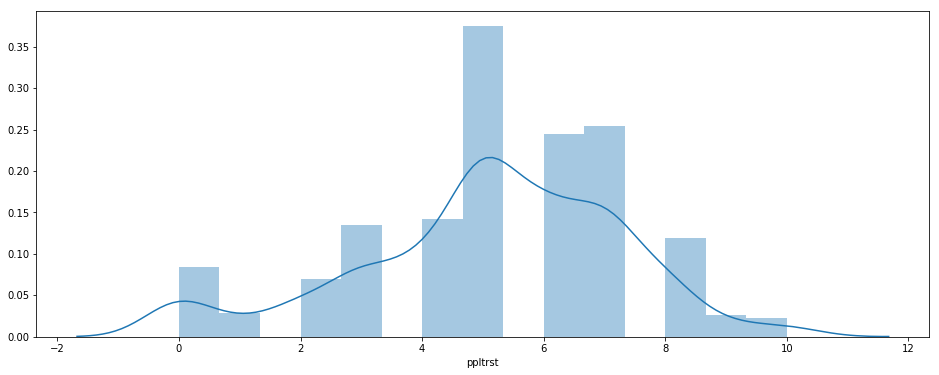

Country: ES; Year: 7


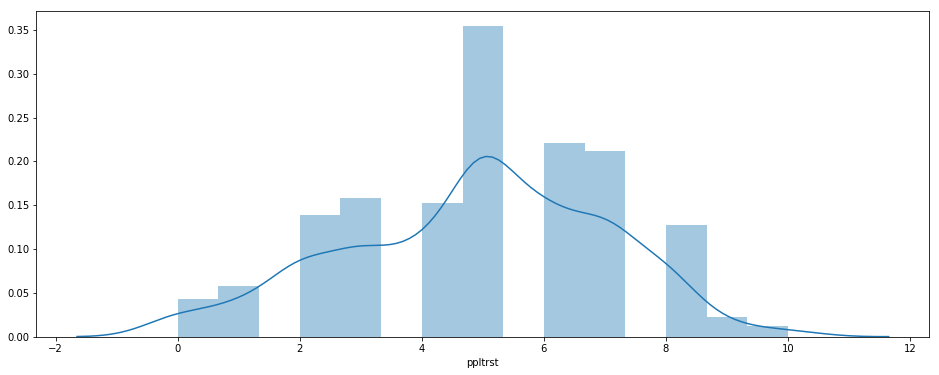

Country: NO; Year: 6


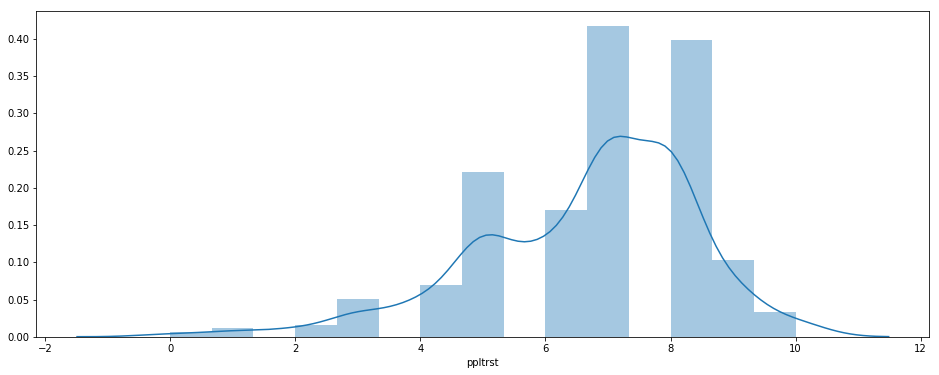

Country: NO; Year: 7


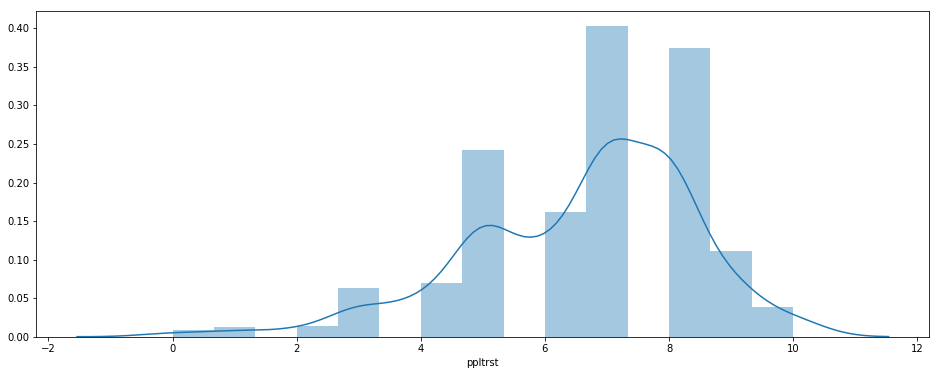

In [7]:
# look at distribution for each country and year, then independent t-test to determine significance
# if not normally distributed
countries = ['CH', 'CZ', 'DE', 'ES', 'NO']
years = [6, 7]

for country in countries:
    for year in years:
        data = ESS_data[(ESS_data['year'] == year) & (ESS_data['cntry'] == country)]['ppltrst']
        data = data.dropna()
        print(f'Country: {country}; Year: {year}')
        plt.figure(figsize=(16,6))
        sns.distplot(data,bins=15)
        plt.show()

In [9]:
for country in countries:
    data2012 = ESS_data[(ESS_data['year'] == 6) & (ESS_data['cntry'] == country)]['ppltrst']
    data2012 = data2012.dropna()
    data2014 = ESS_data[(ESS_data['year'] == 7) & (ESS_data['cntry'] == country)]['ppltrst']
    data2014 = data2014.dropna()
    test = stats.ttest_ind(data2012, data2014, equal_var = False)
    print(f'{country}: {test}')

CH: Ttest_indResult(statistic=-0.6782716584661505, pvalue=0.4977011063404715)
CZ: Ttest_indResult(statistic=-0.47644754173026976, pvalue=0.6338354980999384)
DE: Ttest_indResult(statistic=-0.18084358577434545, pvalue=0.8581944023636154)
ES: Ttest_indResult(statistic=2.4943102203929204, pvalue=0.01268641266582651)
NO: Ttest_indResult(statistic=0.5437669865283744, pvalue=0.5866850621156425)


All of the countries and years are fairly normally distributed, but there are a few like China in 2014 and especially DE in 2014 that don't look very normal. 

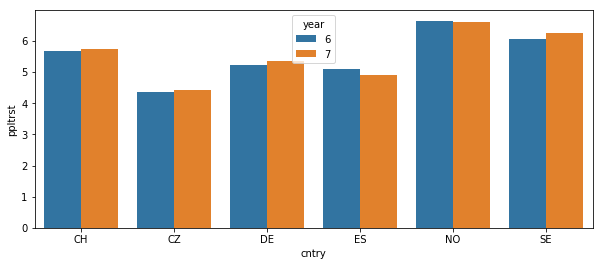

In [10]:
plt.figure(figsize=(10,4))
sns.barplot(x='cntry',y='ppltrst',data=ESS_data_year_country, hue='year')
plt.show()

Trust increased from 2012 to 2014 in CH, CZ, DE, and SE, but not in ES and NO.

2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [12]:
ESS_data_year_country_2012 = ESS_data[ESS_data['year'] == 6].groupby(['cntry','year'],as_index=False)['happy'].mean()
ESS_data_year_country_2014 = ESS_data[ESS_data['year'] == 7].groupby(['cntry','year'],as_index=False)['happy'].mean()
ESS_data_year_country = pd.DataFrame(ESS_data_year_country_2012)
ESS_data_year_country = pd.concat([ESS_data_year_country, ESS_data_year_country_2014],ignore_index=False)

Country: CH; Year: 6


c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


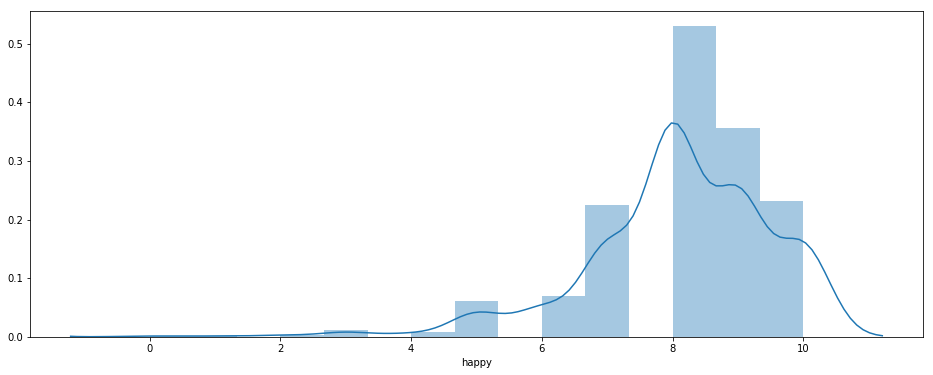

Country: CH; Year: 7


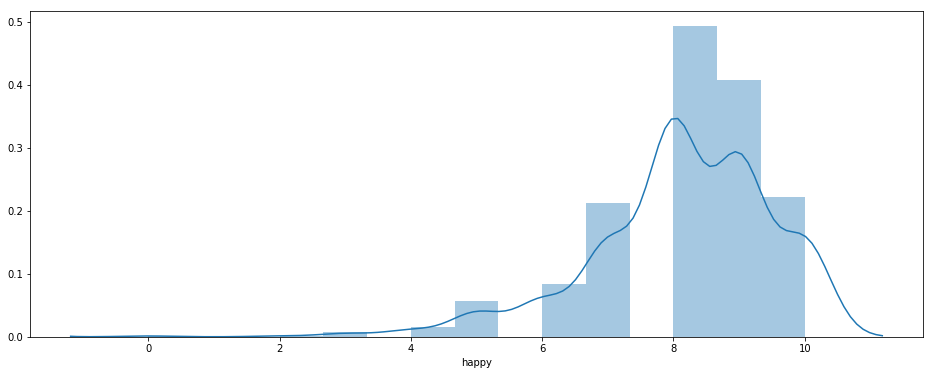

Country: CZ; Year: 6


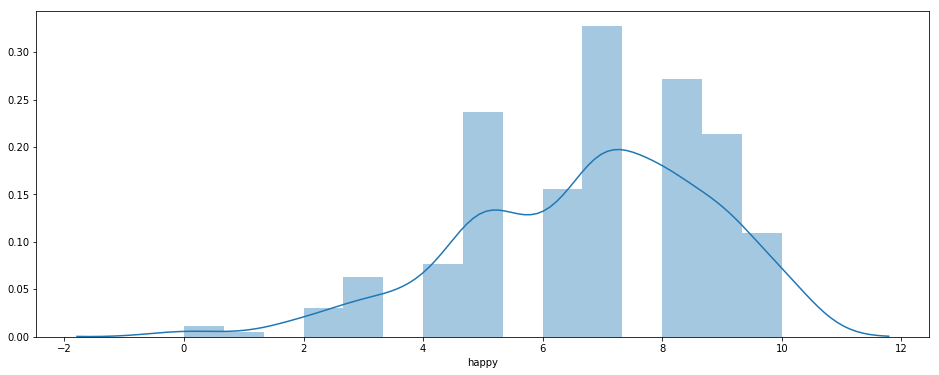

Country: CZ; Year: 7


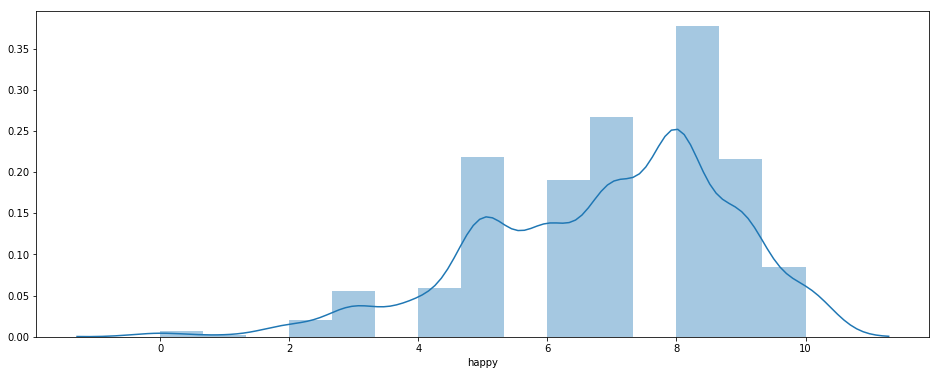

Country: DE; Year: 6


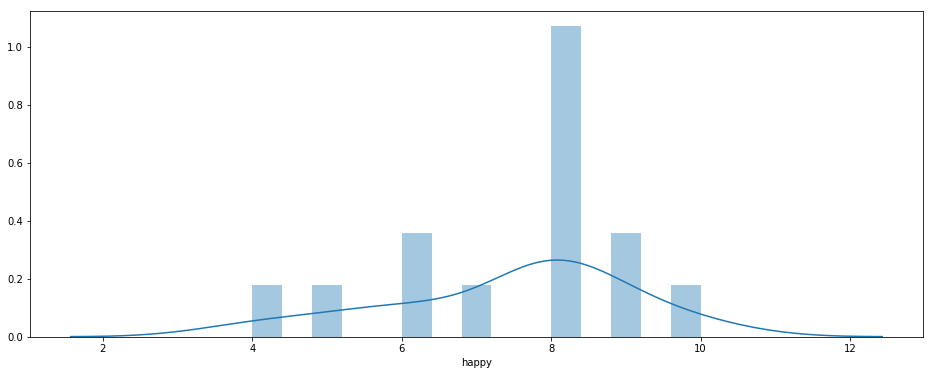

Country: DE; Year: 7


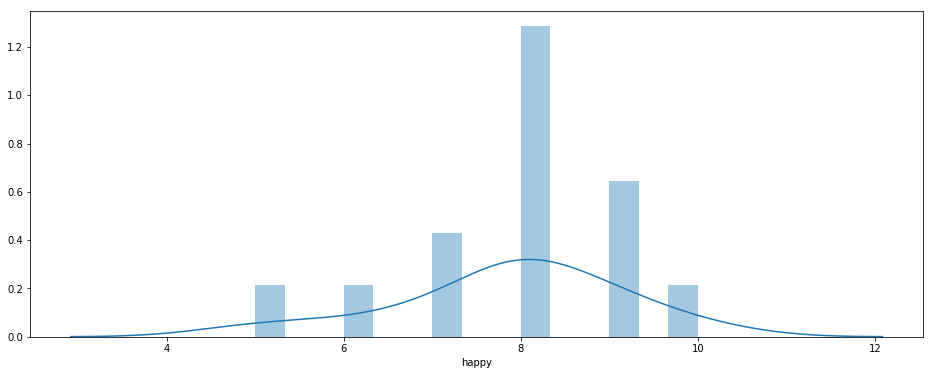

Country: ES; Year: 6


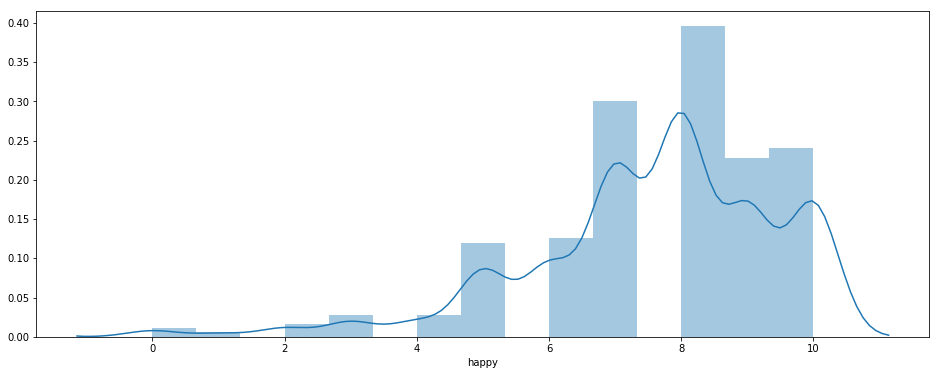

Country: ES; Year: 7


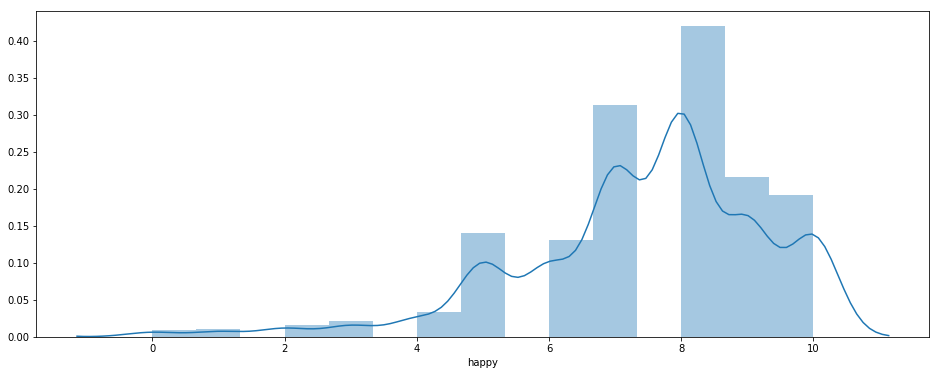

Country: NO; Year: 6


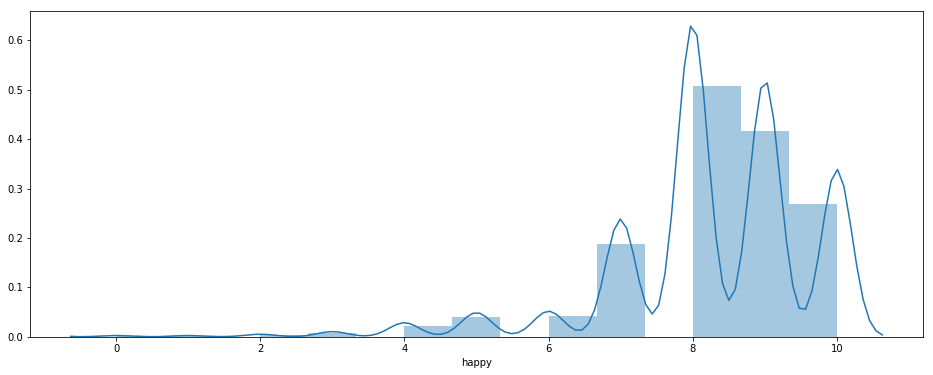

Country: NO; Year: 7


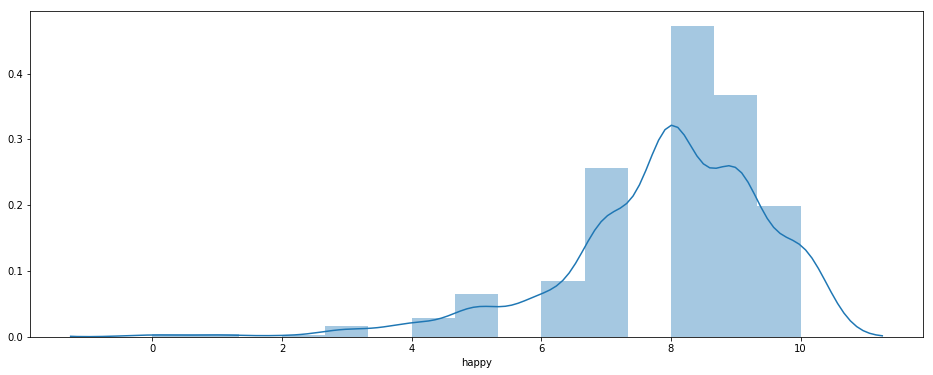

In [13]:
# look at distribution for each country and year, then independent t-test to determine significance
# if not normally distributed
countries = ['CH', 'CZ', 'DE', 'ES', 'NO']
years = [6, 7]

for country in countries:
    for year in years:
        data = ESS_data[(ESS_data['year'] == year) & (ESS_data['cntry'] == country)]['happy']
        data = data.dropna()
        print(f'Country: {country}; Year: {year}')
        plt.figure(figsize=(16,6))
        sns.distplot(data,bins=15)
        plt.show()

In [14]:
for country in countries:
    data2012 = ESS_data[(ESS_data['year'] == 6) & (ESS_data['cntry'] == country)]['happy']
    data2012 = data2012.dropna()
    data2014 = ESS_data[(ESS_data['year'] == 7) & (ESS_data['cntry'] == country)]['happy']
    data2014 = data2014.dropna()
    test = stats.ttest_ind(data2012, data2014, equal_var = False)
    print(f'{country}: {test}')

CH: Ttest_indResult(statistic=-0.38837456613010163, pvalue=0.6977925483154912)
CZ: Ttest_indResult(statistic=-1.3029204227411397, pvalue=0.19283506260925784)
DE: Ttest_indResult(statistic=-0.7648529270389165, pvalue=0.45163931842397975)
ES: Ttest_indResult(statistic=1.6739845099484867, pvalue=0.09426282196252893)
NO: Ttest_indResult(statistic=4.266585719065751, pvalue=2.1141544820103535e-05)


NO doesn't look very normal in its distribution, might have to do a different statistical test.

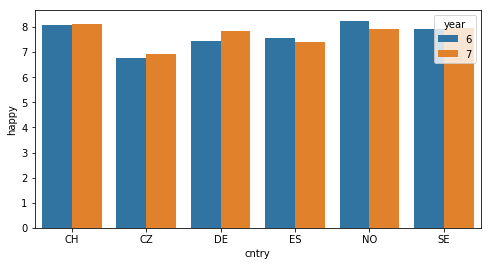

In [15]:
plt.figure(figsize=(8,4))
sns.barplot(x='cntry',y='happy',data=ESS_data_year_country, hue='year')
plt.show()

People became happier in CZ and DE and slightly happier in CH and SE. They became less happy in ES and NO.

3. Who reported watching more TV in 2012, men or women?

In [16]:
ESS_data_year_country_2012 = ESS_data[ESS_data['year'] == 6].groupby(['gndr'],as_index=False)['tvtot'].mean()
ESS_data_year_country = pd.DataFrame(ESS_data_year_country_2012)

In [17]:
ESS_data_year_country

,gndr,tvtot
0,1.0,3.901906
1,2.0,3.944393


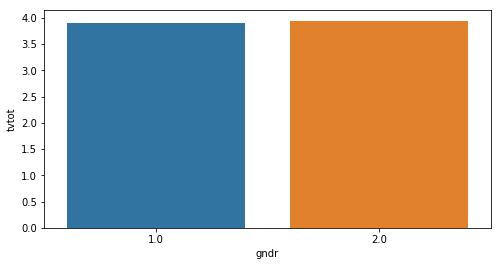

In [18]:
plt.figure(figsize=(8,4))
sns.barplot(x='gndr',y='tvtot',data=ESS_data_year_country)
plt.show()

In [27]:
data_men = ESS_data[(ESS_data['year'] == 6) & (ESS_data['gndr'] == 1)]['tvtot']
data_men = data_men.dropna()
data_women = ESS_data[(ESS_data['year'] == 6) & (ESS_data['gndr'] == 2)]['tvtot']
data_women = data_women.dropna()

c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


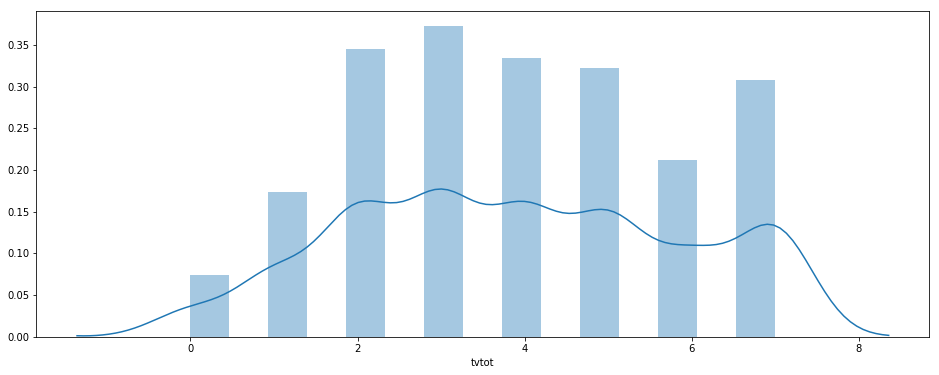

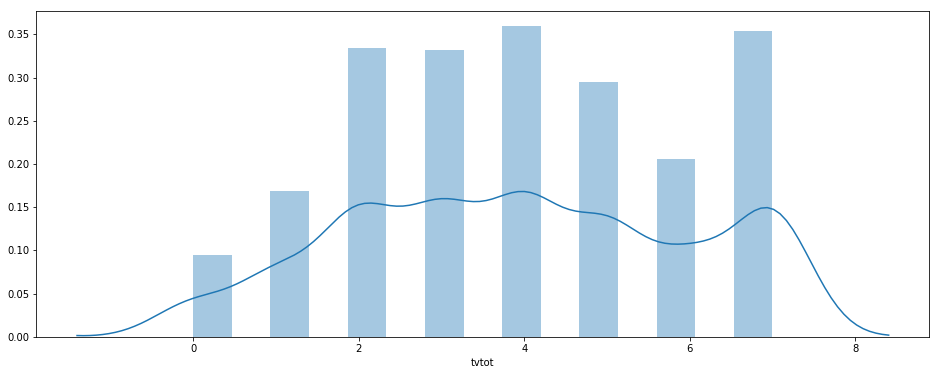

In [28]:
plt.figure(figsize=(16,6))
sns.distplot(data_men,bins=15)
plt.show()

plt.figure(figsize=(16,6))
sns.distplot(data_women,bins=15)
plt.show()

In [30]:
test = stats.ttest_ind(data_men, data_women, equal_var = False)
print(test)

Ttest_indResult(statistic=-0.6899351288552367, pvalue=0.49027236479485914)


In [31]:
test = stats.f_oneway(data_men, data_women)
print(test)

F_onewayResult(statistic=0.4760900791225934, pvalue=0.49023604027095813)


Women reported watching more tv in 2012 by 1% total tv time on average.

4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [20]:
ESS_data_year_country_2012 = ESS_data[ESS_data['year'] == 6].groupby(['partner'],as_index=False)['pplfair'].mean()
ESS_data_year_country_2012

,partner,pplfair
0,1.0,6.080736
1,2.0,5.856965


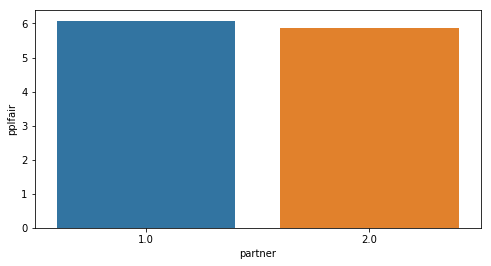

In [21]:
plt.figure(figsize=(8,4))
sns.barplot(x='partner',y='pplfair',data=ESS_data_year_country_2012)
plt.show()

In [32]:
data_part = ESS_data[(ESS_data['year'] == 6) & (ESS_data['partner'] == 1)]['pplfair']
data_part = data_part.dropna()
data_nopart = ESS_data[(ESS_data['year'] == 6) & (ESS_data['partner'] == 2)]['pplfair']
data_nopart = data_nopart.dropna()

c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


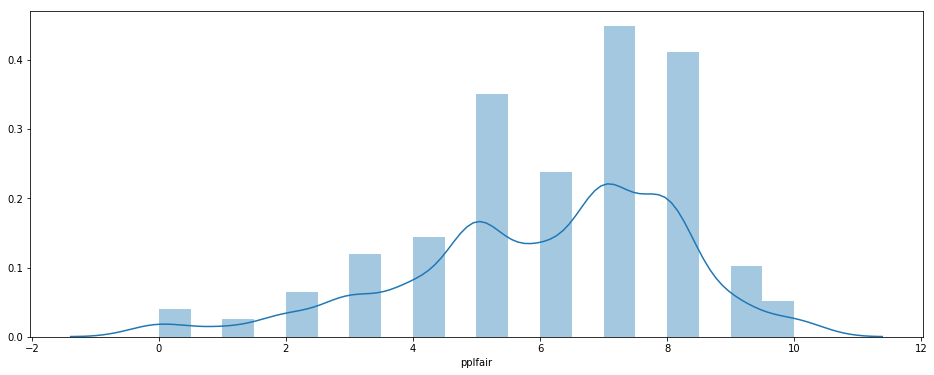

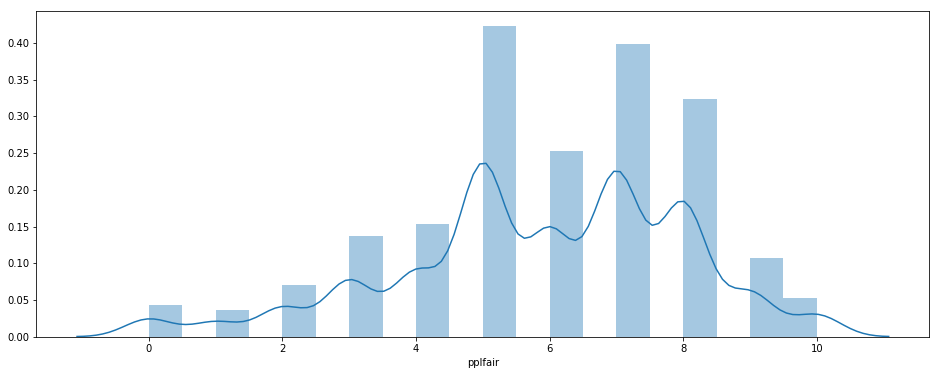

In [34]:
plt.figure(figsize=(16,6))
sns.distplot(data_part,bins=20)
plt.show()

plt.figure(figsize=(16,6))
sns.distplot(data_nopart,bins=20)
plt.show()

In [24]:
test = stats.ttest_ind(data_part, data_nopart, equal_var = False)
print(test)

Ttest_indResult(statistic=3.3027889746563357, pvalue=0.0009673897763136988)


In [41]:
ANOVA_test = stats.f_oneway(data_part, data_nopart)
print(ANOVA_test)

F_onewayResult(statistic=11.023086567011378, pvalue=0.0009073952609876207)


People who had a partner were much more likely to think people were fair (+3.8% more likely).

5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [37]:
ESS_data_year_country_2012 = ESS_data[ESS_data['year'] == 7].groupby(['cntry'],as_index=False)['sclmeet'].mean()
ESS_data_year_country_2012.sort_values(by='sclmeet')

,cntry,sclmeet
2,DE,4.428571
1,CZ,4.445802
0,CH,5.160622
3,ES,5.260116
4,NO,5.302326
5,SE,5.426211


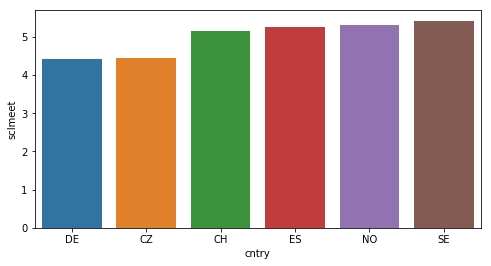

In [38]:
plt.figure(figsize=(8,4))
sns.barplot(x='cntry',y='sclmeet',data=ESS_data_year_country_2012.sort_values(by='sclmeet'))
plt.show()

Country: CH


c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


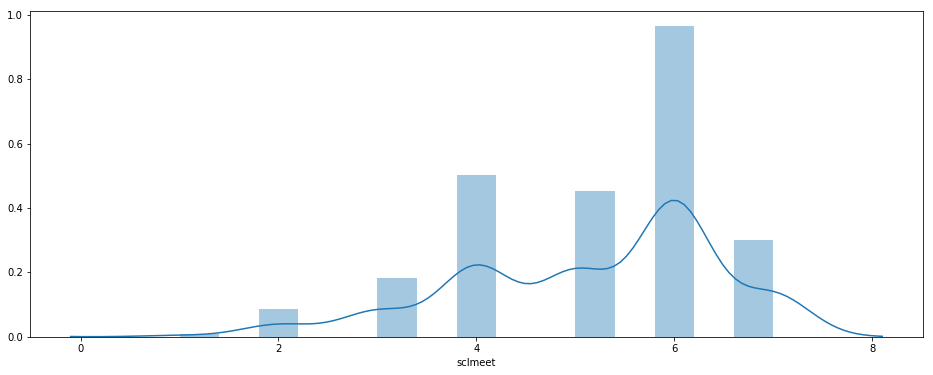

Country: CZ


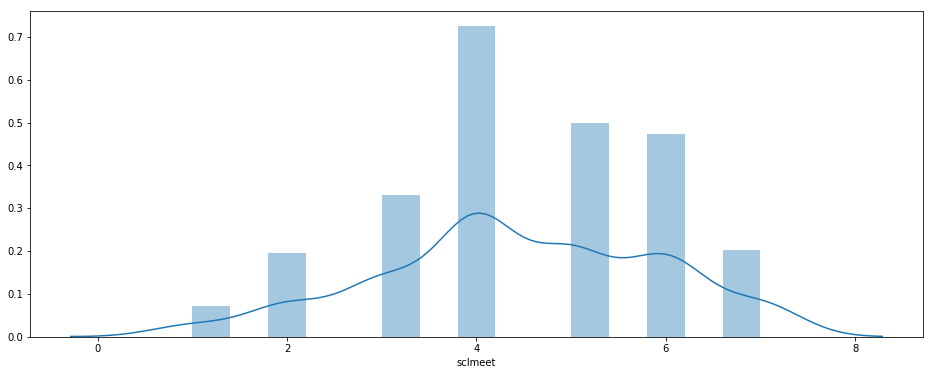

Country: DE


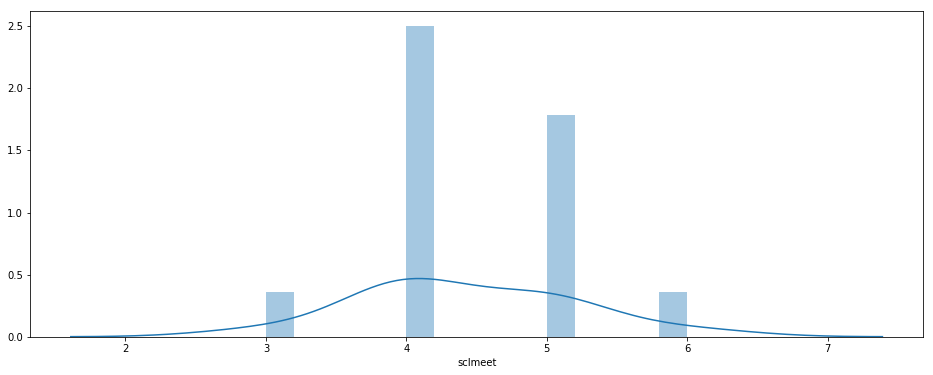

Country: ES


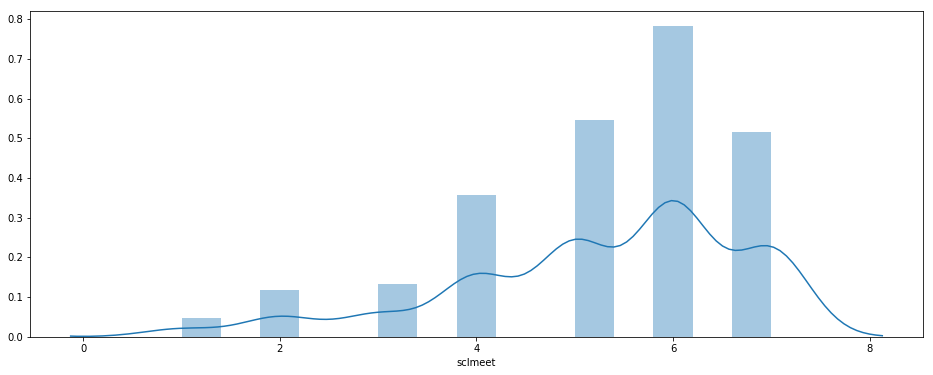

Country: NO


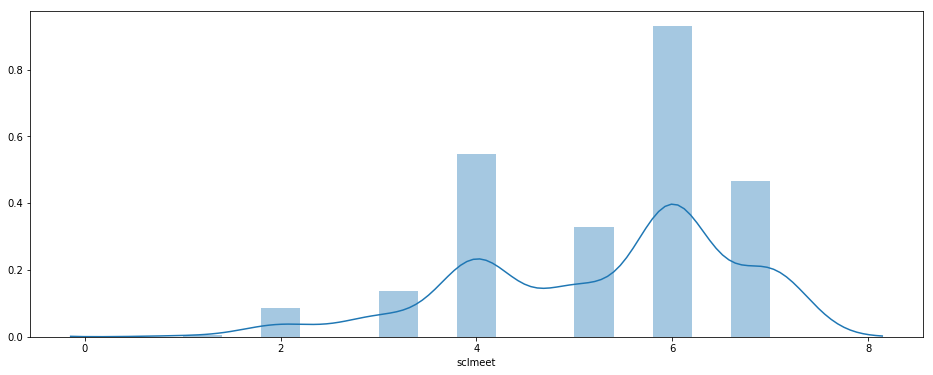

In [42]:
# look at distribution for each country and year, then independent t-test to determine significance
# if not normally distributed
countries = ['CH', 'CZ', 'DE', 'ES', 'NO']

for country in countries:
    data = ESS_data[(ESS_data['year'] == 7) & (ESS_data['cntry'] == country)]['sclmeet']
    data = data.dropna()
    print(f'Country: {country}')
    plt.figure(figsize=(16,6))
    sns.distplot(data,bins=15)
    plt.show()

None of the distributions are very normal.

In [47]:
data_CH = ESS_data[(ESS_data['year'] == 7) & (ESS_data['cntry'] == 'CH')]['sclmeet']
data_CZ = ESS_data[(ESS_data['year'] == 7) & (ESS_data['cntry'] == 'CZ')]['sclmeet']
data_DE = ESS_data[(ESS_data['year'] == 7) & (ESS_data['cntry'] == 'DE')]['sclmeet']
data_ES = ESS_data[(ESS_data['year'] == 7) & (ESS_data['cntry'] == 'ES')]['sclmeet']

data_CH = data_CH.dropna() 
data_CZ = data_CZ.dropna()
data_DE = data_DE.dropna()
data_ES = data_ES.dropna()

In [48]:
test_CH_CZ = stats.f_oneway(data_CH, data_CZ)
test_CH_DE = stats.f_oneway(data_CH, data_DE )
test_CH_ES = stats.f_oneway(data_CH, data_ES)
test_CZ_DE = stats.f_oneway(data_CZ, data_DE )
test_CZ_ES = stats.f_oneway(data_CZ, data_CZ)
test_DE_ES = stats.f_oneway(data_DE , data_ES)

print(f'Countries: CH and CZ  {test_CH_CZ}')
print(f'Countries: CH and DE  {test_CH_DE}')
print(f'Countries: CH and ES  {test_CH_ES}')
print(f'Countries: CZ and CZ  {test_CZ_DE}')
print(f'Countries: CZ and ES  {test_CZ_ES}')
print(f'Countries: DE and ES  {test_DE_ES}')

Countries: CH and CZ  F_onewayResult(statistic=93.6220867670434, pvalue=1.7204743885389243e-21)
Countries: CH and DE  F_onewayResult(statistic=4.3519355460755955, pvalue=0.0372896047141496)
Countries: CH and ES  F_onewayResult(statistic=2.3541738739712694, pvalue=0.12510774525055496)
Countries: CZ and CZ  F_onewayResult(statistic=0.001880622494097523, pvalue=0.9654226437202417)
Countries: CZ and ES  F_onewayResult(statistic=3.300220138313862e-30, pvalue=1.0)
Countries: DE and ES  F_onewayResult(statistic=4.476574937113799, pvalue=0.03456418756614022)


6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [68]:
ESS_data_year_country_2012 = ESS_data[ESS_data['year'] == 7].groupby(['cntry','agea'],as_index=False)['sclact'].mean()

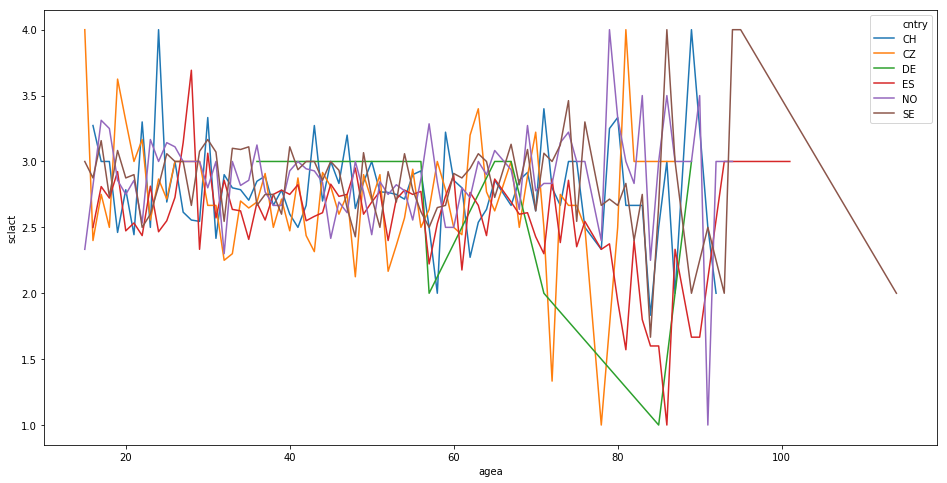

In [74]:
plt.figure(figsize=(16,8))
sns.lineplot(x='agea',y='sclact',data=ESS_data_year_country_2012, hue='cntry')
plt.show()

Country: CH


c:\users\kylem\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


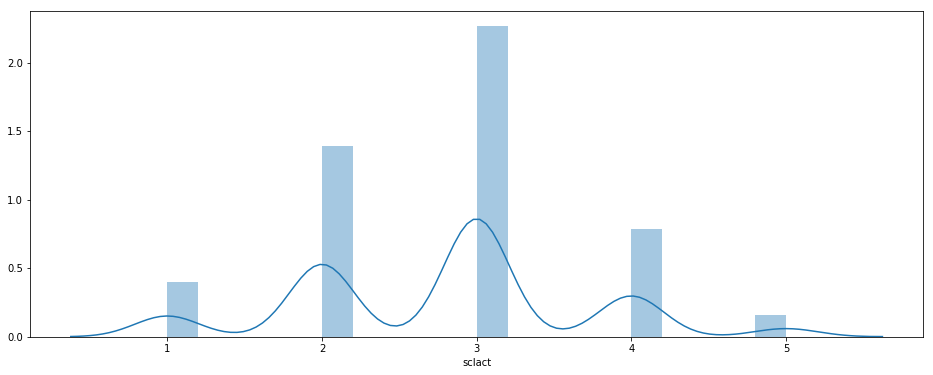

Country: CZ


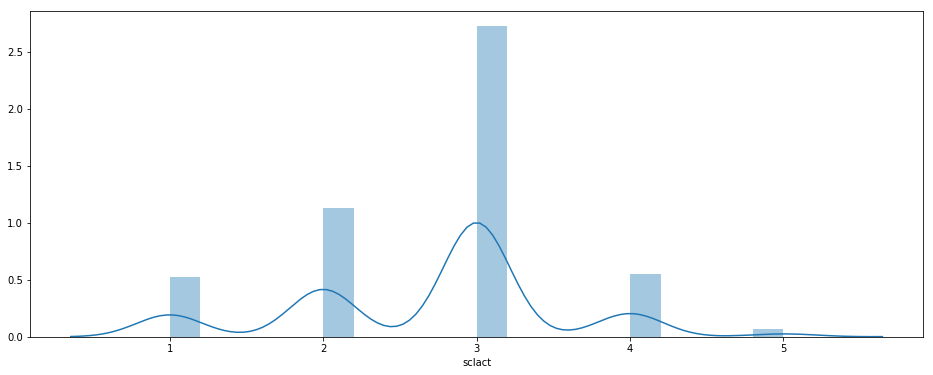

Country: DE


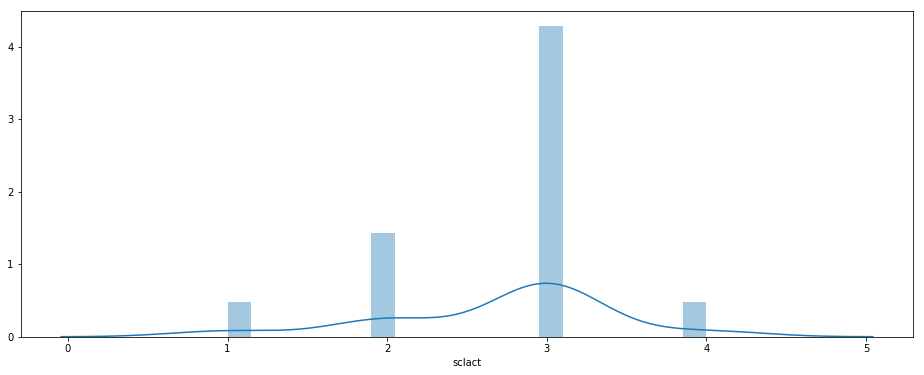

Country: ES


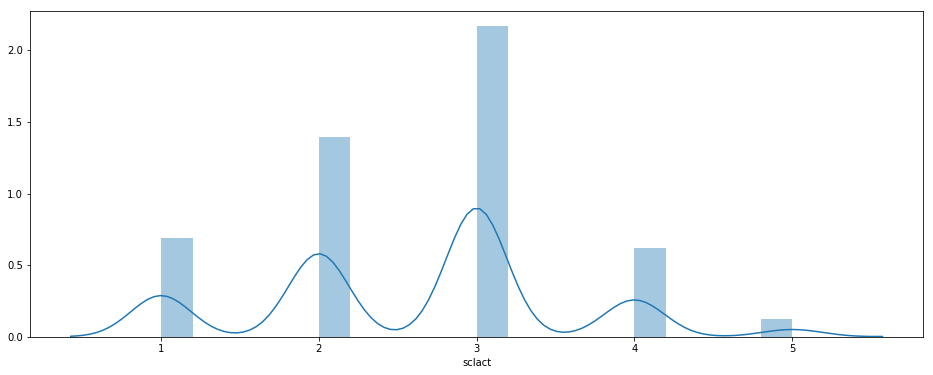

Country: NO


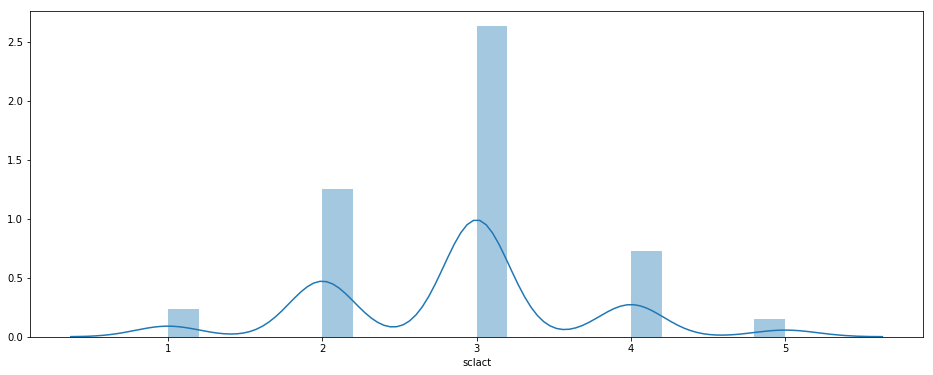

In [50]:
# look at distribution for each country and year, then independent t-test to determine significance
# if not normally distributed
countries = ['CH', 'CZ', 'DE', 'ES', 'NO']

for country in countries:
    data = ESS_data[(ESS_data['year'] == 7) & (ESS_data['cntry'] == country)]['sclact']
    data = data.dropna()
    print(f'Country: {country}')
    plt.figure(figsize=(16,6))
    sns.distplot(data,bins=20)
    plt.show()

In [51]:
data_CH = ESS_data[(ESS_data['year'] == 7) & (ESS_data['cntry'] == 'CH')]['sclact']
data_CZ = ESS_data[(ESS_data['year'] == 7) & (ESS_data['cntry'] == 'CZ')]['sclact']
data_DE = ESS_data[(ESS_data['year'] == 7) & (ESS_data['cntry'] == 'DE')]['sclact']
data_ES = ESS_data[(ESS_data['year'] == 7) & (ESS_data['cntry'] == 'ES')]['sclact']

data_CH = data_CH.dropna() 
data_CZ = data_CZ.dropna()
data_DE = data_DE.dropna()
data_ES = data_ES.dropna()

In [52]:
test_CH_CZ = stats.ttest_ind(data_CH, data_CZ , equal_var=True)
test_CH_DE = stats.ttest_ind(data_CH, data_DE , equal_var=True)
test_CH_ES = stats.ttest_ind(data_CH, data_ES , equal_var=True)
test_CZ_DE = stats.ttest_ind(data_CZ, data_DE , equal_var=True)
test_CZ_ES = stats.ttest_ind(data_CZ, data_CZ , equal_var=True)
test_DE_ES = stats.ttest_ind(data_DE , data_ES , equal_var=True)

print(f'Countries: CH and CZ  {test_CH_CZ}')
print(f'Countries: CH and DE  {test_CH_DE}')
print(f'Countries: CH and ES  {test_CH_ES}')
print(f'Countries: CZ and CZ  {test_CZ_DE}')
print(f'Countries: CZ and ES  {test_CZ_ES}')
print(f'Countries: DE and ES  {test_DE_ES}')

Countries: CH and CZ  Ttest_indResult(statistic=1.665721791943212, pvalue=0.09599050025440872)
Countries: CH and DE  Ttest_indResult(statistic=0.2746903478421981, pvalue=0.7836271662948312)
Countries: CH and ES  Ttest_indResult(statistic=3.7901178679751157, pvalue=0.00015515309017284228)
Countries: CZ and CZ  Ttest_indResult(statistic=-0.04890685579084129, pvalue=0.9610082764822516)
Countries: CZ and ES  Ttest_indResult(statistic=0.0, pvalue=1.0)
Countries: DE and ES  Ttest_indResult(statistic=0.3809408460233457, pvalue=0.7033147402370797)
